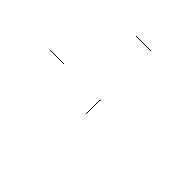

In [3]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

def draw_antennas(image, antennas, attenuation):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Iterar sobre las coordenadas de las antenas
    for (x, y), azimuth in antennas:
        # Origen del vector
        origin = (x, y)

        # Calcular el desplazamiento en x e y basado en el ángulo y la atenuación
        dx = math.cos(math.radians(azimuth))
        dy = math.sin(math.radians(azimuth))

        # Dibujar el vector desde la antena hasta el límite definido por la atenuación
        for i in range(attenuation):
            # Calcular las coordenadas del punto a lo largo del vector
            px = int(x + dx * i)
            py = int(y + dy * i)

            # Asegurarse de que las coordenadas estén dentro de la imagen
            if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                # Colorear el píxel en escala de grises
                gray_image[py, px] = 0  # Negro
                # Puedes ajustar el valor (0) para obtener diferentes tonos de gris

    return gray_image

# Definir las coordenadas de las antenas y sus direcciones de azimuth
antennas = [((50, 50), 45), ((100, 100), 135), ((150, 50), 225)]

# Tamaño de la imagen
image_size = (180, 180)

# Crear una imagen en blanco
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Definir la atenuación
attenuation = 20  # Puedes ajustar este valor según sea necesario

# Dibujar las antenas en la imagen
result_image = draw_antennas(image, antennas, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)


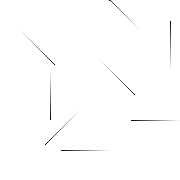

In [6]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

def draw_antennas(image, antennas, attenuation):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Iterar sobre las coordenadas de las antenas
    for (x, y), azimuth in antennas:
        # Origen del vector
        origin = (x, y)

        # Calcular el desplazamiento en x e y basado en el ángulo y la atenuación
        dx = math.cos(math.radians(azimuth))
        dy = math.sin(math.radians(azimuth))

        # Dibujar el vector desde la antena hasta el límite definido por la atenuación
        for i in range(attenuation):
            # Calcular las coordenadas del punto a lo largo del vector
            px = int(x + dx * i)
            py = int(y + dy * i)

            # Asegurarse de que las coordenadas estén dentro de la imagen
            if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                # Calcular la intensidad del píxel basada en la distancia al origen de la antena
                intensity = int(255 * (1 - i / attenuation))  # Atenuación gradual

                # Colorear el píxel en escala de grises
                gray_image[py, px] = intensity

    return gray_image

# Definir las coordenadas de las antenas y sus direcciones de azimuth

antennas = [
    ((20, 30), 45),   # Antena 1
    ((50, 70), 90),   # Antena 2
    ((80, 110), 135), # Antena 3
    ((110, 150), 180),# Antena 4
    ((140, 30), 225), # Antena 5
    ((170, 70), 270), # Antena 6
    ((200, 110), 315),# Antena 7
    ((230, 150), 0),  # Antena 8
    ((100, 60), 45),  # Antena 9
    ((180, 120), 180) # Antena 10
]

# Tamaño de la imagen
image_size = (180, 180)

# Crear una imagen en blanco
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Definir la atenuación
attenuation = 50  # Puedes ajustar este valor según sea necesario

# Dibujar las antenas en la imagen
result_image = draw_antennas(image, antennas, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)


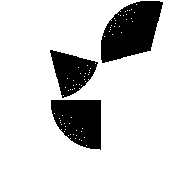

In [7]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

def draw_antennas(image, antennas, attenuation):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Iterar sobre las coordenadas de las antenas
    for (x, y), azimuth, amplitude in antennas:
        # Dibujar el sector circular para cada antena
        for angle in range(azimuth - amplitude, azimuth + amplitude + 1):
            # Calcular el desplazamiento en x e y basado en el ángulo
            dx = math.cos(math.radians(angle))
            dy = math.sin(math.radians(angle))

            # Dibujar el vector desde la antena hasta el límite definido por la atenuación
            for i in range(attenuation):
                # Calcular las coordenadas del punto a lo largo del vector
                px = int(x + dx * i)
                py = int(y + dy * i)

                # Asegurarse de que las coordenadas estén dentro de la imagen
                if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                    # Colorear el píxel en escala de grises
                    gray_image[py, px] = 0  # Negro
                    # Puedes ajustar el valor (0) para obtener diferentes tonos de gris

    return gray_image

# Definir las coordenadas de las antenas, sus direcciones de azimuth y amplitudes de ángulo
antennas = [
    ((50, 50), 45, 30),   # Antena 1
    ((100, 100), 135, 45),   # Antena 2
    ((150, 50), 225, 60)   # Antena 3
    # Puedes agregar más antenas según sea necesario
]

# Tamaño de la imagen
image_size = (180, 180)

# Crear una imagen en blanco
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Definir la atenuación
attenuation = 50  # Puedes ajustar este valor según sea necesario

# Dibujar las antenas en la imagen
result_image = draw_antennas(image, antennas, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)


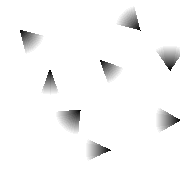

In [13]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

def draw_antennas(image, antennas, attenuation):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Iterar sobre las coordenadas de las antenas
    for (x, y), azimuth, amplitude in antennas:
        # Dibujar el sector circular para cada antena
        for angle in range(azimuth - amplitude, azimuth + amplitude + 1):
            # Calcular el desplazamiento en x e y basado en el ángulo
            dx = math.cos(math.radians(angle))
            dy = math.sin(math.radians(angle))

            # Dibujar el vector desde la antena hasta el límite definido por la atenuación
            for i in range(attenuation):
                # Calcular las coordenadas del punto a lo largo del vector
                px = int(x + dx * i)
                py = int(y + dy * i)

                # Asegurarse de que las coordenadas estén dentro de la imagen
                if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                    # Calcular la intensidad del píxel basada en la distancia al origen de la antena
                    intensity = int(255 * (i / attenuation))  # Atenuación gradual inversa

                    # Colorear el píxel en escala de grises
                    gray_image[py, px] = intensity

    return gray_image

# Definir las coordenadas de las antenas, sus direcciones de azimuth y amplitudes de ángulo
antennas = [
    ((20, 30), 45, 30),   # Antena 1
    ((50, 70), 90, 20),   # Antena 2
    ((80, 110), 135, 40), # Antena 3
    ((110, 150), 180, 25),# Antena 4
    ((140, 30), 225, 30), # Antena 5
    ((170, 70), 270, 35), # Antena 6
    ((200, 110), 315, 20),# Antena 7
    ((230, 150), 0, 45),  # Antena 8
    ((100, 60), 45, 25),  # Antena 9
    ((180, 120), 180, 30) # Antena 10
]

# Tamaño de la imagen
image_size = (180, 180)

# Crear una imagen en blanco
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Definir la atenuación
attenuation = 25  # Puedes ajustar este valor según sea necesario

# Dibujar las antenas en la imagen
result_image = draw_antennas(image, antennas, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)


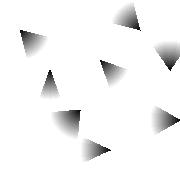

In [5]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow

def draw_antennas(image, antenna_data, attenuation):
    # Convertir la imagen a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Parsear la información de las antenas
    antennas = parse_antennas(antenna_data)

    # Iterar sobre las antenas
    for (x, y), azimuth, amplitude in antennas:
        # Dibujar el sector circular para cada antena
        for angle in range(azimuth - amplitude, azimuth + amplitude + 1):
            # Calcular el desplazamiento en x e y basado en el ángulo
            dx = math.cos(math.radians(angle))
            dy = math.sin(math.radians(angle))

            # Dibujar el vector desde la antena hasta el límite definido por la atenuación
            for i in range(attenuation):
                # Calcular las coordenadas del punto a lo largo del vector
                px = int(x + dx * i)
                py = int(y + dy * i)

                # Asegurarse de que las coordenadas estén dentro de la imagen
                if 0 <= px < image.shape[1] and 0 <= py < image.shape[0]:
                    # Calcular la intensidad del píxel basada en la distancia al origen de la antena
                    intensity = int(255 * (i / attenuation))  # Atenuación gradual inversa

                    # Colorear el píxel en escala de grises
                    gray_image[py, px] = intensity

    return gray_image

def parse_antennas(antenna_list):
    antennas = []
    for i in range(0, len(antenna_list), 4):
        x = antenna_list[i]
        y = antenna_list[i + 1]
        azimuth = antenna_list[i + 2]
        amplitude = antenna_list[i + 3]
        antennas.append(((x, y), azimuth, amplitude))
    return antennas

# Tamaño de la imagen
image_size = (180, 180)

# Crear una imagen en blanco
image = np.ones((image_size[0], image_size[1], 3), dtype=np.uint8) * 255

# Lista de antenas en formato cíclico (x, y, azimuth, amplitud)
antenna_data = [
    20, 30, 45, 30,
    50, 70, 90, 20,
    80, 110, 135, 40,
    110, 150, 180, 25,
    140, 30, 225, 30,
    170, 70, 270, 35,
    200, 110, 315, 20,
    230, 150, 0, 45,
    100, 60, 45, 25,
    180, 120, 180, 30
]

# Definir la atenuación
attenuation = 30  # Puedes ajustar este valor según sea necesario

# Dibujar las antenas en la imagen
result_image = draw_antennas(image, antenna_data, attenuation)

# Mostrar la imagen resultante
cv2_imshow(result_image)

